# **PyTorch Computer Vision** 💻


## Using `torchvision.models`

`torchvision.models` provides access to a collection of pre-trained models for various computer vision tasks. These models have been trained on large datasets and can be used directly or fine-tuned for your specific task.

Here are a few popular models available:

*   **ResNet**: Residual Networks, known for their depth and performance on image classification.
*   **VGG**: VGG networks, characterized by their simple and repetitive structure.
*   **EfficientNet**: Models that scale network depth, width, and resolution in a more principled way.

You can easily load these models and use them for tasks like image classification.

You can then modify the final layer of the pre-trained model to fit the number of classes in your specific dataset if you are using it for a different classification task than it was originally trained on.

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)


2.8.0+cu126
0.23.0+cu126


## 1. Getting a dataset

The dataset we using is FashinMNIST from `torchvision.datasets`

In [2]:
# Setup training data
from torchvision import datasets
train_data  = datasets.FashionMNIST(
    root= "data", # where to download data to?
    train = True, # do we want the training datasets?
    download=True,  # do we want to download?
    transform = torchvision.transforms.ToTensor(), # how do we want to be tranform the data?
    target_transform=None # how do we want to transform the labels/targets?
)
test_data = datasets.FashionMNIST(
    root= "data", # where to download data to?
    train = False, # do we want the training datasets?
    download=True,  # do we want to download?
    transform = torchvision.transforms.ToTensor(), # how do we want to be tranform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.28MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 61.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# See the first training data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Text(0.5, 1.0, 'Ankle boot')

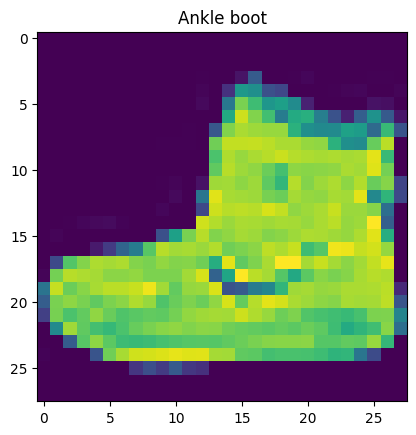

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

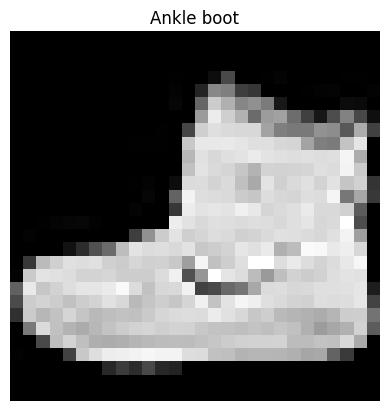

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

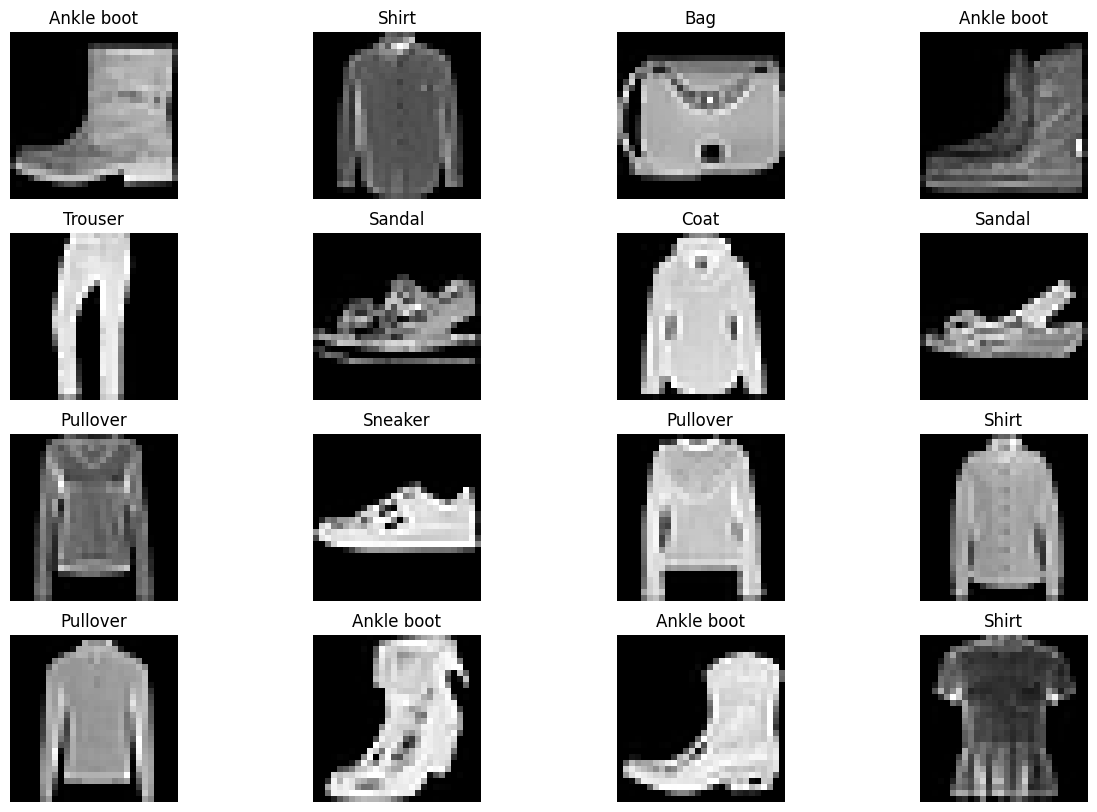

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(15,10))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


Do you think these items of clothing (images) could be modelled with pure linear lines? or you think we'll need non-linearities?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

more specifically, we want to turn our data into batches (or mini-batches)

why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our NN more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameters
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa8dd388680>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa8dd3a3e90>)

In [14]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fa8dd388680>, <torch.utils.data.dataloader.DataLoader object at 0x7fa8dd3a3e90>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


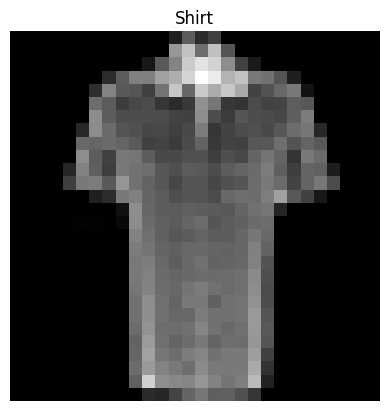

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments , it'a best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In othyer words: start simply and add complexity when necessary

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x= train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units=10, # how many units in the hidde layer
    output_shape = len(class_names) # onr for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - for multiclass data it will be `nn.CrossEntropyLoss`

* Optimizer = `torch.oprim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problm  let's use accuracy as our evaluation metrics


In [22]:
!pip -q install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.1 MB/s eta 0:00:00


In [23]:
from torchmetrics import  Accuracy


**OR**

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)


In [25]:
# Import accuracy metrics\
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Creating  a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float,device:torch.device=None):
  """Prints difference between start and end time."""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
start_time = timer()
# some code....
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


6.718800000271585e-05

### 3.3 Creating a training loop and training a model on batches of data

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [28]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
import torch
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time because we have to perform some experiments)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_preds = model_0(X)

        # 2. Calculate the loss
        loss = loss_fn(y_preds, y)
        train_loss += loss  # accumulate the loss per batch then take AVG

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 42.692 seconds


## 4. Make predictions and get Model 0 results

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)


  return {"model_name":model.__class__.__name__, # only works when the model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using a GPU if there is one)

In [30]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [31]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [32]:

# Create a model with linear and non-linearity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [33]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of flatten layer
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available

next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, Optimizer and evaluation metrics

In [34]:
from helper_functions import accuracy_fn
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # measure how wong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1) # tries to update our model's parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops
So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    """Perform a training with model trying to  learn on data_loader"""
    train_loss, train_acc = 0,0

    # Put model into training mode
    model.to(device)
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (Outputs the raw logits from the model)
        y_preds = model(X)

        # 2. Calculate the loss and accuracy (per batch)
        loss = loss_fn(y_preds, y)
        train_loss += loss  # accumulate the loss per batch then take AVG
        train_acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1)) # go from logits -> prediction labels


        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [36]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
    """Perform a training with model trying to  learn on data_loader"""
    test_loss, test_acc = 0,0

    # Put model into evaluating mode
    model.to(device)
    model.eval()

    with torch.inference_mode():
      # Add a loop to loop through the training batches
      for X, y in (data_loader):
          # Put data on target device
          X, y = X.to(device), y.to(device)


          # 1. Forward pass (Outputs the raw logits from the model)
          test_pred = model(X)

          # 2. Calculate the loss and accuracy (per batch)
          loss = loss_fn(test_pred, y)
          test_loss += loss  # accumulate the loss per batch then take AVG
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)
          ) # go from logits -> prediction labels

      # Divide total train loss by length of train dataloader
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a Optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             )
  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             )

  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Train time on cpu: 11.537 seconds
Epoch: 1
-------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Train time on cpu: 27.438 seconds
Epoch: 2
-------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cpu: 39.427 seconds


In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [39]:
total_train_time_model_0 # Train time on CPU

42.69229816000001

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on cpu than GPU.
>
> Why is this?
>
> 1. It could be that overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU


In [40]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device= device):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #  Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)


  return {"model_name":model.__class__.__name__, # only works when the model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [41]:
# Get model_1 results dictionary  # Non-linearity
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [42]:
model_0_results # Baseline model

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a convolutional Neural Network (CNN)

CNN's are also known as ConvNets

CNN's are also known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/


Let's break down the CNN architecture we're building, step by step.

A typical CNN for image classification consists of a few main types of layers:

1.  **Convolutional Layers (`nn.Conv2d`)**: These are the core building blocks of a CNN. They apply a set of learnable filters (kernels) to the input image to detect patterns like edges, corners, and textures.
    *   `in_channels`: The number of color channels in the input image (e.g., 1 for grayscale, 3 for RGB).
    *   `out_channels`: The number of filters you want to learn in this layer. Each filter will produce a feature map.
    *   `kernel_size`: The size of the filter (e.g., 3x3).
    *   `stride`: How far the filter moves across the image. A stride of 1 means it moves one pixel at a time.
    *   `padding`: Adding extra pixels around the border of the image. This helps to preserve spatial information and prevent the output size from shrinking too quickly.

2.  **Activation Functions (`nn.ReLU`)**: After a convolutional layer, an activation function is usually applied. The Rectified Linear Unit (ReLU) is a common choice. It introduces non-linearity to the model, allowing it to learn more complex patterns. It simply outputs the input if it's positive, and zero otherwise.

3.  **Pooling Layers (`nn.MaxPool2d`)**: These layers reduce the spatial dimensions (width and height) of the feature maps. This helps to reduce the number of parameters and computation in the network, and also makes the model more robust to small variations in the position of features. Max pooling takes the maximum value within a defined window (kernel size) and stride.

4.  **Flatten Layer (`nn.Flatten`)**: Before passing the output of the convolutional and pooling layers to the fully connected layers, we need to flatten the 2D feature maps into a 1D vector.

5.  **Linear Layers (`nn.Linear`)**: These are also known as fully connected layers. They take the flattened features and perform a linear transformation. These layers are typically used at the end of the network for classification, mapping the features to the desired output classes.

In our `FashionMNISTModelV2`, we have two convolutional blocks, each followed by a ReLU activation and a MaxPool2d layer. These blocks are responsible for extracting features from the input images. The output of the second convolutional block is then flattened and passed to a linear layer for classification.

In [43]:
import torch
from torch import nn

# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
    """
    Model Architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print("Output shape of conv_block_1:", x.shape)
        x = self.conv_block_2(x)
        # print("Output shape of conv_block_2:", x.shape)
        x = self.classifier(x)
        # print(f"Output shape of classifier:", x.shape)
        return x


In [44]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [45]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [46]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [47]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [48]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# pass the data to the Conv layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [49]:
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [50]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and Max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer: torch.Size([10, 62, 62])
Shape after going through conv_layer and Max_pool_layer: torch.Size([10, 31, 31])


In [51]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our image
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"\nRandom tensor shape:\n {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensdor to max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool tensor:\n {max_pool_tensor}")
print(f"\nMax Pool tensor shape:\n {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max Pool tensor:
 tensor([[[[0.3367]]]])

Max Pool tensor shape:
 torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [52]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
  test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2= print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%
Epoch: 1
-------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%
Epoch: 2
-------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%
Train time on cpu: 175.276 seconds


In [54]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

##  8. Compare model results and training time

In [55]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [56]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]


compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,42.692298
1,FashionMNISTModelV1,0.685001,75.019968,39.427144
2,FashionMNISTModelV2,0.327190,88.069089,175.276330


Text(0, 0.5, 'model')

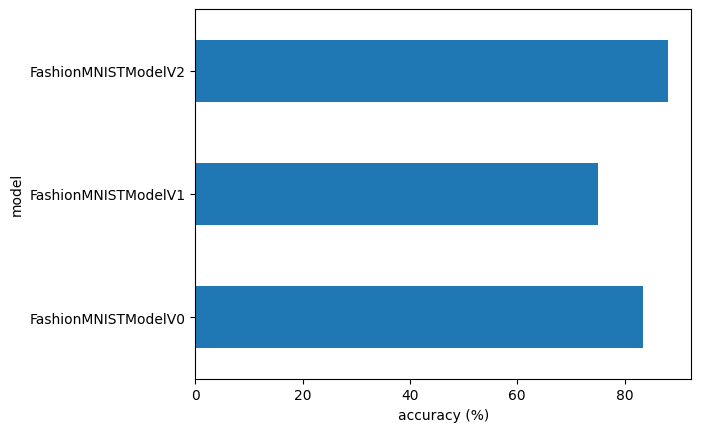

In [57]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model


In [58]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample(add a batch dimension pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass(model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probabilities (logits --> prediction probabilities)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [59]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [60]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

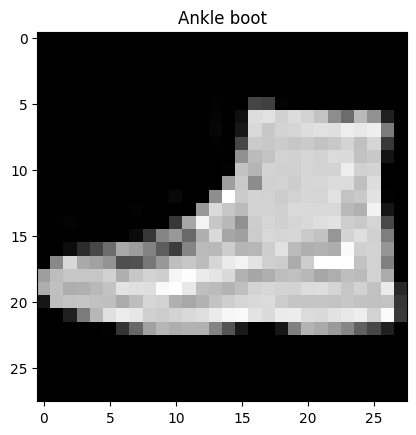

In [61]:
plt.imshow(test_samples[5].squeeze(), cmap="gray")
plt.title(class_names[test_labels[5]])
plt.show()

In [62]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data = test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[6.4798e-03, 2.5480e-05, 9.6827e-02, 2.1857e-03, 3.8052e-01, 1.9943e-05,
         5.1142e-01, 4.6395e-06, 2.4727e-03, 4.6396e-05],
        [4.0073e-07, 2.7145e-07, 1.8215e-06, 1.0736e-05, 1.2837e-06, 7.3608e-04,
         4.3556e-08, 9.9913e-01, 1.1418e-04, 5.5380e-06]])

In [63]:
# Convert predictions probabilties to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 7, 1, 6, 1, 9, 2, 6, 3])

In [64]:
test_labels

[2, 7, 1, 6, 1, 9, 2, 4, 3]

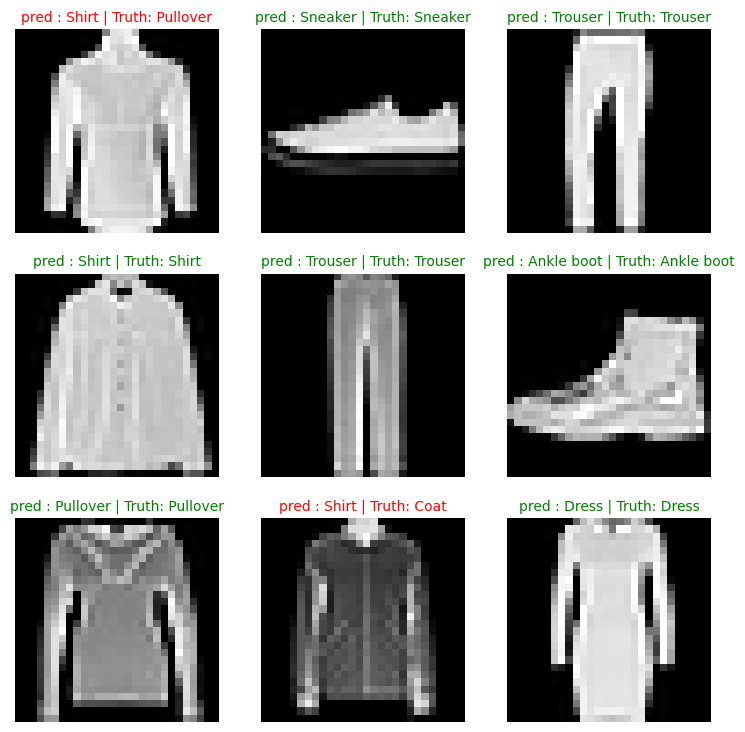

In [65]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the prediction (in the text from, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in the text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"pred : {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change colour color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="green")  # Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="red")

  plt.axis(False)

## 10: Making a confusion matrix for further prediction evaluation ⚓

▶ A confusion matrix is a fantastic way of evaluating your classification models visually
: https://docs.pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html


1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://lightning.ai/docs/torchmetrics/stable/
3. Plot the confusion matrix using `mlxtend.Plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [66]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    #Send the data and targets to target device
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> predictions probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of predictions into a tensor
  # print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

In [67]:
print(len(y_pred_tensor))
y_pred_tensor

10000


tensor([9, 2, 1,  ..., 8, 1, 8])

In [72]:
import torchmetrics

In [73]:
# See if required packages are installed and if not, install them....
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.4
mlxtend version: 0.23.4


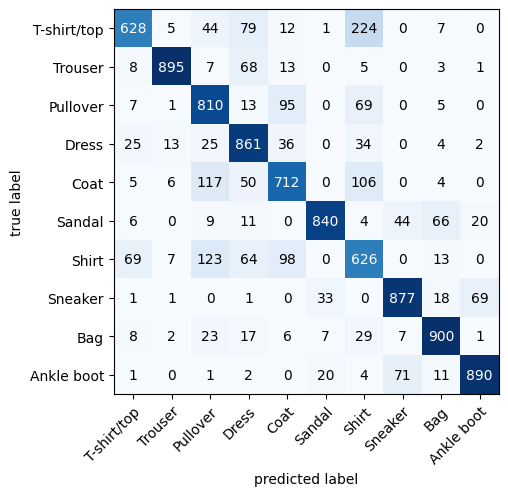

In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize=(8,5)
)

## 11. Save and Load the best performing models

In [82]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)


# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME

# Save the model  state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [83]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [84]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [85]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [87]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)